<a href="https://colab.research.google.com/github/Stephanie-Daniella/Stock-Returns-Neural-Nerwork/blob/main/Neural_Network_Returns_Multiple_Stocks_Monthly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7, 7)
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import StandardScaler

import random
import math

# Data Cleaning

In [101]:
Start_Date_Str='2015-01-01'
Final_Date_Str='2025-02-19'

In [102]:
Assets_list=['QTWO', 'TTMI', 'BOX', 'OMCL', 'ADBE', 'FSLR', 'AMAT', 'FIVN', 'IVAC', 'AEIS', 'ISSC', 'KOPN', 'VRNS', 'NTCT', 'UCTT', 'CRM', 'PXLW', 'HUBS', 'COMM', 'AXTI', 'VRSN', 'GSIT', 'NVDA', 'QLYS', 'ORCL', 'AAPL', 'QCOM', 'TRT', 'GLOB', 'KTCC', "EMKR","PAYC", "IDN", "AMBA","GDDY","VECO","DOCU","RPD" ,"NTAP","VRNT","OSIS","UPLD","SNX" ,"MSTR","IPDN","BCOV","QUIK", "ENPH","ANSS","PLUS"]

In [103]:
data = yf.download(Assets_list, start=Start_Date_Str,end=Final_Date_Str, interval='1mo', auto_adjust=False)

[*********************100%***********************]  50 of 50 completed


In [104]:
data

Price        Adj Close                                                 \
Ticker            AAPL        ADBE        AEIS        AMAT       AMBA   
Date                                                                    
2015-01-01   26.062212   70.129997   23.604843   20.069115  55.310001   
2015-02-01   28.575893   79.099998   26.181707   22.011005  57.389999   
2015-03-01   27.788664   73.940002   25.237513   19.905552  75.709999   
2015-04-01   27.949459   76.059998   24.057270   17.461468  73.150002   
2015-05-01   29.095127   79.089996   28.050423   17.761463  90.209999   
...                ...         ...         ...         ...        ...   
2024-10-01  225.413895  478.079987  108.435776  180.737686  56.189999   
2024-11-01  236.808823  515.929993  114.940132  173.899551  71.550003   
2024-12-01  250.144974  444.679993  115.629997  162.256271  72.739998   
2025-01-01  235.740814  437.450012  115.080002  179.935547  76.720001   
2025-02-01  245.280319  444.320007  126.540001  171.584778  78.199997   

Price                                                     ...      Volume  \
Ticker            ANSS  AXTI  BCOV        BOX       COMM  ...         RPD   
Date                                                      ...               
2015-01-01   80.669998  2.78  7.16  18.809999  28.105000  ...         NaN   
2015-02-01   85.970001  2.74  7.81  18.660000  31.500000  ...         NaN   
2015-03-01   88.190002  2.69  7.33  19.750000  28.540001  ...         NaN   
2015-04-01   85.839996  2.38  6.92  17.110001  29.510000  ...         NaN   
2015-05-01   89.000000  2.53  7.05  17.639999  31.170000  ...         NaN   
...                ...   ...   ...        ...        ...  ...         ...   
2024-10-01  320.410004  2.58  2.16  31.760000   6.730000  ...  14988700.0   
2024-11-01  351.100006  2.14  4.27  35.090000   4.770000  ...  15416700.0   
2024-12-01  337.329987  2.17  4.35  31.600000   5.210000  ...  17424000.0   
2025-01-01  350.500000  2.09  4.44  33.389999   5.050000  ...  10942100.0   
2025-02-01  334.209991  1.58  4.45  33.470001   5.010000  ...  13245400.0   

Price                                                                 \
Ticker           SNX     TRT      TTMI      UCTT      UPLD      VECO   
Date                                                                   
2015-01-01   8825800  435400  10429400   2082700    767900   6593100   
2015-02-01   6951800   87500  12599400   2727600    609400   8312700   
2015-03-01  11331400   89300   8799000   3096700    778700   7314700   
2015-04-01  11388200  705700   9377400   7632600    512700   6074400   
2015-05-01   5754200  375700  11828200   5500600   1052600   7121600   
...              ...     ...       ...       ...       ...       ...   
2024-10-01  13115700  425500  14545900  11133000   2220500  14534800   
2024-11-01  10906800  201400  13069900   7737100   7631800  12896500   
2024-12-01  13661200  175800  12689200   6555500  13558700  12398700   
2025-01-01  14710600  203900  11587100   6771600   4899800  13205900   
2025-02-01   7509200   45000  14277900   3778800   2263800  11454200   

Price                                     
Ticker          VRNS      VRNT      VRSN  
Date                                      
2015-01-01   9887400  18958457  19633700  
2015-02-01  11516400  17581021  25848000  
2015-03-01   8352000  19732667  20209400  
2015-04-01   5955000  12421078  25416400  
2015-05-01  19304100  12804649  19094200  
...              ...       ...       ...  
2024-10-01  37679300  16544600  13531000  
2024-11-01  33862100  13174500  12890100  
2024-12-01  28707600  25437200  13833400  
2025-01-01  31263800  13166400  14313500  
2025-02-01  35493000   6399200  11614400  

[122 rows x 300 columns]

In [105]:
adj_close = data['Adj Close']
adj_close

Ticker,AAPL,ADBE,AEIS,AMAT,AMBA,ANSS,AXTI,BCOV,BOX,COMM,...,RPD,SNX,TRT,TTMI,UCTT,UPLD,VECO,VRNS,VRNT,VRSN
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,26.062212,70.129997,23.604843,20.069115,55.310001,80.669998,2.78,7.16,18.809999,28.105000,...,NaN,33.272964,2.94,6.950000,8.800000,7.92,29.170000,10.990000,27.193071,54.480000
2015-02-01,28.575893,79.099998,26.181707,22.011005,57.389999,85.970001,2.74,7.81,18.660000,31.500000,...,NaN,34.251820,2.85,8.810000,8.260000,7.05,30.490000,10.296667,31.013754,64.019997
2015-03-01,27.788664,73.940002,25.237513,19.905552,75.709999,88.190002,2.69,7.33,19.750000,28.540001,...,NaN,34.701035,2.71,9.010000,7.150000,7.01,30.549999,8.553333,31.548651,66.970001
2015-04-01,27.949459,76.059998,24.057270,17.461468,73.150002,85.839996,2.38,6.92,17.110001,29.510000,...,NaN,34.364132,2.81,9.350000,6.010000,6.16,29.510000,9.583333,31.293938,63.509998
2015-05-01,29.095127,79.089996,28.050423,17.761463,90.209999,89.000000,2.53,7.05,17.639999,31.170000,...,NaN,37.197563,3.17,9.880000,6.470000,7.62,30.280001,6.726667,32.944473,63.189999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-01,225.413895,478.079987,108.435776,180.737686,56.189999,320.410004,2.58,2.16,31.760000,6.730000,...,40.419998,114.611229,6.12,22.440001,33.450001,2.16,28.780001,50.369999,21.299999,176.839996
2024-11-01,236.808823,515.929993,114.940132,173.899551,71.550003,351.100006,2.14,4.27,35.090000,4.770000,...,42.599998,118.624359,6.90,24.379999,38.430000,3.67,27.870001,49.959999,25.200001,187.179993
2024-12-01,250.144974,444.679993,115.629997,162.256271,72.739998,337.329987,2.17,4.35,31.600000,5.210000,...,40.230000,116.919617,5.81,24.750000,35.950001,4.34,26.799999,44.430000,27.450001,206.960007


In [106]:
returns = adj_close.pct_change().dropna()
returns

Ticker,AAPL,ADBE,AEIS,AMAT,AMBA,ANSS,AXTI,BCOV,BOX,COMM,...,RPD,SNX,TRT,TTMI,UCTT,UPLD,VECO,VRNS,VRNT,VRSN
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-01,0.130763,0.124910,0.100420,0.022347,0.048723,0.007052,0.239316,0.062176,0.123360,-0.232862,...,0.121459,0.070018,-0.147602,0.293400,0.006282,0.316894,0.103560,0.188217,0.002375,0.110884
2018-06-01,-0.005598,-0.021943,-0.113536,-0.086755,-0.209783,0.069902,-0.027586,-0.058537,-0.026869,-0.003922,...,-0.108936,-0.096517,-0.032468,-0.022185,-0.057889,-0.039407,-0.164223,-0.040567,0.050948,0.053511
2018-07-01,0.027983,0.003568,0.054226,0.052825,0.014763,-0.030428,0.070922,-0.113990,-0.041217,0.099469,...,-0.014529,-0.000415,0.033557,-0.015315,-0.191566,-0.088740,0.028070,-0.197651,0.012401,0.056833
2018-08-01,0.196227,0.076958,-0.027106,-0.115360,-0.022205,0.101255,0.046358,-0.040936,0.025042,-0.013080,...,0.371809,0.008686,-0.067100,0.077189,0.137109,0.188378,-0.180887,0.236303,0.081292,0.092130
2018-09-01,-0.004825,0.024439,-0.133098,-0.097456,0.009658,0.003764,-0.094937,0.024390,-0.026466,-0.029347,...,-0.032241,-0.126534,0.060325,-0.149198,-0.177588,-0.131918,-0.145833,-0.008796,0.031926,0.009520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-01,-0.030429,-0.076674,0.031262,-0.101312,-0.003900,0.005586,0.066116,0.000000,-0.029636,0.101473,...,0.013287,-0.039390,0.104693,0.229589,-0.162284,-0.132530,-0.131301,-0.108496,-0.159100,-0.069067
2024-11-01,0.050551,0.079171,0.059983,-0.037835,0.273358,0.095784,-0.170543,0.976852,0.104849,-0.291233,...,0.053934,0.035015,0.127451,0.086453,0.148879,0.699074,-0.031619,-0.008140,0.183099,0.058471
2024-12-01,0.056316,-0.138100,0.006002,-0.066954,0.016632,-0.039220,0.014019,0.018735,-0.099459,0.092243,...,-0.055634,-0.014371,-0.157971,0.015176,-0.064533,0.182561,-0.038393,-0.110689,0.089286,0.105674


In [107]:
scaler = StandardScaler()
rendimientos_estandarizados = scaler.fit_transform(returns)
rendimientos_estandarizados_df = pd.DataFrame(rendimientos_estandarizados, columns=returns.columns)
rendimientos_estandarizados_df

Ticker,AAPL,ADBE,AEIS,AMAT,AMBA,ANSS,AXTI,BCOV,BOX,COMM,...,RPD,SNX,TRT,TTMI,UCTT,UPLD,VECO,VRNS,VRNT,VRSN
0,1.228807,1.182232,0.798320,0.003484,0.185347,-0.063159,1.118679,0.374104,1.103856,-0.904869,...,0.879108,0.451696,-0.923596,2.405101,-0.095122,1.859286,0.752827,1.379154,-0.049312,1.471341
1,-0.374460,-0.369473,-1.200177,-1.000914,-1.422695,0.702967,-0.148644,-0.369036,-0.357727,-0.043440,...,-0.932651,-1.055039,-0.270361,-0.313581,-0.492935,-0.180359,-1.470351,-0.453416,0.390632,0.629018
2,0.020375,-0.099908,0.366839,0.284064,-0.025901,-0.520033,0.319098,-0.710419,-0.497313,0.345589,...,-0.190260,-0.185542,0.104243,-0.254393,-1.321638,-0.462763,0.126099,-1.711668,0.041499,0.677788
3,1.998494,0.675553,-0.392866,-1.264259,-0.255862,1.085161,0.202460,-0.260680,0.147317,-0.077898,...,2.847786,-0.103207,-0.466852,0.542500,0.715907,1.123599,-1.608702,1.764321,0.665471,1.195999
4,-0.365365,0.120623,-1.382907,-1.099430,-0.057657,-0.103239,-0.468443,0.141483,-0.353803,-0.139105,...,-0.329546,-1.326615,0.256115,-1.407759,-1.234985,-0.709937,-1.317678,-0.198928,0.218341,-0.016839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,-0.666407,-0.947775,0.152336,-1.134924,-0.141995,-0.081022,0.296276,-0.008669,-0.384650,0.353128,...,0.028471,-0.538179,0.507847,1.855385,-1.140109,-0.713439,-1.197028,-0.997529,-1.511868,-1.170624
78,0.285716,0.698938,0.420617,-0.550552,1.582697,1.018462,-0.827439,6.005085,0.923764,-1.124500,...,0.348109,0.135010,0.636968,0.622305,0.788874,4.047077,-0.369452,-0.193675,1.587583,0.701835
79,0.353497,-1.596832,-0.083610,-0.818627,-0.014277,-0.627199,0.048906,0.106670,-1.063953,0.318400,...,-0.513498,-0.311814,-0.982429,0.008280,-0.534124,1.090301,-0.425686,-1.015095,0.737876,1.394846
80,-0.985670,-0.309410,-0.184101,0.800837,0.222624,0.326794,-0.192710,0.118702,0.454792,-0.144235,...,-0.410262,1.764573,0.148220,-0.178152,0.024579,-0.139432,-0.546836,0.039190,-0.753848,0.413741


In [108]:
size_Train= int(len(returns) * 0.8)
size_Test=int(len(returns))-size_Train

train_df = rendimientos_estandarizados_df.iloc[:size_Train]
test_df = rendimientos_estandarizados_df.iloc[size_Train-15:]

#train_df = returns.iloc[:size_Train]
#test_df = returns.iloc[size_Train-15:]

train_df

Ticker,AAPL,ADBE,AEIS,AMAT,AMBA,ANSS,AXTI,BCOV,BOX,COMM,...,RPD,SNX,TRT,TTMI,UCTT,UPLD,VECO,VRNS,VRNT,VRSN
0,1.228807,1.182232,0.798320,0.003484,0.185347,-0.063159,1.118679,0.374104,1.103856,-0.904869,...,0.879108,0.451696,-0.923596,2.405101,-0.095122,1.859286,0.752827,1.379154,-0.049312,1.471341
1,-0.374460,-0.369473,-1.200177,-1.000914,-1.422695,0.702967,-0.148644,-0.369036,-0.357727,-0.043440,...,-0.932651,-1.055039,-0.270361,-0.313581,-0.492935,-0.180359,-1.470351,-0.453416,0.390632,0.629018
2,0.020375,-0.099908,0.366839,0.284064,-0.025901,-0.520033,0.319098,-0.710419,-0.497313,0.345589,...,-0.190260,-0.185542,0.104243,-0.254393,-1.321638,-0.462763,0.126099,-1.711668,0.041499,0.677788
3,1.998494,0.675553,-0.392866,-1.264259,-0.255862,1.085161,0.202460,-0.260680,0.147317,-0.077898,...,2.847786,-0.103207,-0.466852,0.542500,0.715907,1.123599,-1.608702,1.764321,0.665471,1.195999
4,-0.365365,0.120623,-1.382907,-1.099430,-0.057657,-0.103239,-0.468443,0.141483,-0.353803,-0.139105,...,-0.329546,-1.326615,0.256115,-1.407759,-1.234985,-0.709937,-1.317678,-0.198928,0.218341,-0.016839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.215906,0.988264,1.118356,1.448704,0.920023,0.226375,1.298340,0.050811,0.532433,-0.616363,...,-0.219987,-0.112879,0.737450,1.256186,1.112737,-1.296206,2.592839,0.950598,-0.222239,-0.055996
61,0.818239,1.663117,1.137554,0.599744,0.858523,0.102519,0.024116,-0.259043,0.321581,1.300919,...,-0.478095,0.285872,-0.268804,0.003301,0.621853,1.654608,0.325000,-0.015701,-0.277825,0.017607
62,-0.158311,1.097967,1.011051,0.246783,-0.136321,0.287510,-0.473160,0.728239,0.522927,-0.783892,...,0.033401,0.271548,0.963660,0.162631,-0.192094,0.601778,0.694823,0.487682,0.525943,-1.132479
63,-0.822150,0.117180,-0.670208,-0.131190,-1.703811,-0.976857,-0.796312,-0.886176,-1.581358,-0.998618,...,0.691348,0.130427,1.108312,0.201491,-0.612435,-0.534467,0.196722,0.773004,-1.277841,-0.376537


In [109]:
test_df

Ticker,AAPL,ADBE,AEIS,AMAT,AMBA,ANSS,AXTI,BCOV,BOX,COMM,...,RPD,SNX,TRT,TTMI,UCTT,UPLD,VECO,VRNS,VRNT,VRSN
50,1.909215,1.134188,1.973441,1.315569,1.886403,1.873258,2.340268,-0.369084,1.180768,1.760436,...,-0.409159,0.743820,0.647630,0.587392,0.663487,-1.216368,0.920128,-1.191199,0.639228,1.758758
51,-0.691364,-1.082641,-0.108356,-1.236817,-1.459585,-1.490044,-0.115114,0.705250,-1.016539,0.917197,...,-0.871355,-0.525827,-0.434229,1.278306,-0.932960,-0.384613,-0.358295,0.476294,0.488449,-0.695254
52,-1.716663,-2.917288,-1.419320,-1.369808,-1.189922,-1.454993,-1.062387,-0.323899,-0.610161,-0.724612,...,-2.072709,-1.599818,-0.024345,-1.518998,-0.879589,-1.234171,-1.214424,-0.371559,-2.855870,-0.843071
53,0.979406,1.524904,0.009953,0.512395,-0.278286,-0.178810,-1.548441,0.382204,1.762536,1.617746,...,0.358418,0.968234,0.182862,1.269751,1.156344,-0.018141,-0.147730,-0.052966,0.428170,2.105214
54,-0.715782,0.739215,1.521823,2.019761,2.095194,1.677475,0.787664,-1.083717,-0.632167,-1.267752,...,-2.832738,0.922258,-0.016104,0.305180,0.766631,-0.310772,0.644486,-1.783146,0.926185,-0.204216
55,-1.729132,-0.394933,-0.821519,-1.208768,0.555457,-0.758370,-0.849275,-0.342644,1.207979,-0.676982,...,1.149017,-0.853062,-0.570490,-0.653175,-0.565562,-0.266049,-0.649843,0.889751,-0.773223,0.257070
56,0.990807,0.923956,0.618212,1.131678,0.457945,1.100688,1.619300,1.297918,0.172460,0.508844,...,1.287064,0.528943,0.733384,0.243151,-0.040564,1.329829,0.465003,0.507243,0.351090,0.744551
57,-0.054405,-1.461193,-0.105426,0.182545,0.191768,1.555603,-1.243016,-0.950558,0.317298,-0.548291,...,1.389437,-0.652626,-0.802247,-1.454126,-0.463835,-1.882608,0.482485,0.255908,-0.211566,-1.585377
58,1.106454,1.865745,0.364063,0.350012,-1.231769,1.022845,-0.441416,-1.063373,-2.010036,-0.480828,...,-0.307100,-0.156483,0.166014,0.007181,0.118885,-1.427914,-0.161590,-0.444972,-0.104749,0.924946
59,0.032177,-0.351753,-1.235777,-0.936750,-1.358304,-0.840655,-1.580529,-0.437532,-0.216159,-0.879273,...,0.386460,-0.906231,-0.520730,-1.195309,-0.997777,-0.793476,-1.171728,-1.006161,-0.253240,0.570765


In [110]:
train_df['AAPL']

,AAPL
0,1.228807
1,-0.374460
2,0.020375
3,1.998494
4,-0.365365
...,...
60,0.215906
61,0.818239
62,-0.158311
63,-0.822150


# Preocessing for training data

In [111]:
window_size = 16  # Tamaño de la ventana
transformed_returns_Train = []

# Crear las filas transformadas
for asset in Assets_list:
    for i in (range(1,size_Train - window_size+1)):
        row = train_df[asset][i:i + window_size].values
        transformed_returns_Train.append(row)

# Convertir a un nuevo DataFrame
columns = [f'Change_{i}' for i in range(1, window_size)] + ['ChangeToPredict']
transformed_returns_Train = pd.DataFrame(transformed_returns_Train, columns=columns)

# Mostrar el resultado
transformed_returns_Train

,Change_1,Change_2,Change_3,Change_4,Change_5,Change_6,Change_7,Change_8,Change_9,Change_10,Change_11,Change_12,Change_13,Change_14,Change_15,ChangeToPredict
0,-0.133151,0.188075,0.325069,-0.352581,-1.125681,0.047319,-0.845914,1.542510,1.197675,-0.065312,0.622354,-0.359370,0.236308,0.264356,0.932794,-1.144738
1,0.188075,0.325069,-0.352581,-1.125681,0.047319,-0.845914,1.542510,1.197675,-0.065312,0.622354,-0.359370,0.236308,0.264356,0.932794,-1.144738,-0.898087
2,0.325069,-0.352581,-1.125681,0.047319,-0.845914,1.542510,1.197675,-0.065312,0.622354,-0.359370,0.236308,0.264356,0.932794,-1.144738,-0.898087,1.389308
3,-0.352581,-1.125681,0.047319,-0.845914,1.542510,1.197675,-0.065312,0.622354,-0.359370,0.236308,0.264356,0.932794,-1.144738,-0.898087,1.389308,-0.449116
4,-1.125681,0.047319,-0.845914,1.542510,1.197675,-0.065312,0.622354,-0.359370,0.236308,0.264356,0.932794,-1.144738,-0.898087,1.389308,-0.449116,0.509203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,0.087339,1.808426,-0.037887,-0.066282,-0.738711,0.341861,-1.606345,-1.275657,1.587599,0.078131,-1.176525,1.109491,0.755386,-1.042489,-1.214044,1.209265
2446,1.808426,-0.037887,-0.066282,-0.738711,0.341861,-1.606345,-1.275657,1.587599,0.078131,-1.176525,1.109491,0.755386,-1.042489,-1.214044,1.209265,1.263801
2447,-0.037887,-0.066282,-0.738711,0.341861,-1.606345,-1.275657,1.587599,0.078131,-1.176525,1.109491,0.755386,-1.042489,-1.214044,1.209265,1.263801,-0.102805
2448,-0.066282,-0.738711,0.341861,-1.606345,-1.275657,1.587599,0.078131,-1.176525,1.109491,0.755386,-1.042489,-1.214044,1.209265,1.263801,-0.102805,1.638218


In [112]:
ChangeToPredict=transformed_returns_Train['ChangeToPredict']
ChangeToPredict

,ChangeToPredict
0,-1.144738
1,-0.898087
2,1.389308
3,-0.449116
4,0.509203
...,...
2445,1.209265
2446,1.263801
2447,-0.102805
2448,1.638218


In [113]:
del transformed_returns_Train['ChangeToPredict']
transformed_returns_Train

,Change_1,Change_2,Change_3,Change_4,Change_5,Change_6,Change_7,Change_8,Change_9,Change_10,Change_11,Change_12,Change_13,Change_14,Change_15
0,-0.133151,0.188075,0.325069,-0.352581,-1.125681,0.047319,-0.845914,1.542510,1.197675,-0.065312,0.622354,-0.359370,0.236308,0.264356,0.932794
1,0.188075,0.325069,-0.352581,-1.125681,0.047319,-0.845914,1.542510,1.197675,-0.065312,0.622354,-0.359370,0.236308,0.264356,0.932794,-1.144738
2,0.325069,-0.352581,-1.125681,0.047319,-0.845914,1.542510,1.197675,-0.065312,0.622354,-0.359370,0.236308,0.264356,0.932794,-1.144738,-0.898087
3,-0.352581,-1.125681,0.047319,-0.845914,1.542510,1.197675,-0.065312,0.622354,-0.359370,0.236308,0.264356,0.932794,-1.144738,-0.898087,1.389308
4,-1.125681,0.047319,-0.845914,1.542510,1.197675,-0.065312,0.622354,-0.359370,0.236308,0.264356,0.932794,-1.144738,-0.898087,1.389308,-0.449116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,0.087339,1.808426,-0.037887,-0.066282,-0.738711,0.341861,-1.606345,-1.275657,1.587599,0.078131,-1.176525,1.109491,0.755386,-1.042489,-1.214044
2446,1.808426,-0.037887,-0.066282,-0.738711,0.341861,-1.606345,-1.275657,1.587599,0.078131,-1.176525,1.109491,0.755386,-1.042489,-1.214044,1.209265
2447,-0.037887,-0.066282,-0.738711,0.341861,-1.606345,-1.275657,1.587599,0.078131,-1.176525,1.109491,0.755386,-1.042489,-1.214044,1.209265,1.263801
2448,-0.066282,-0.738711,0.341861,-1.606345,-1.275657,1.587599,0.078131,-1.176525,1.109491,0.755386,-1.042489,-1.214044,1.209265,1.263801,-0.102805


# Processing for Testing data

In [114]:
window_size = 16  # Tamaño de la ventana
transformed_returns_Test = []

# Crear las filas transformadas
for asset in Assets_list:
    for i in (range(1,size_Test - window_size+1)):
        row = test_df[asset][i:i + window_size].values
        transformed_returns_Test.append(row)

# Convertir a un nuevo DataFrame
columns = [f'Change_{i}' for i in range(1, window_size)] + ['ChangeToPredict']
transformed_returns_Test = pd.DataFrame(transformed_returns_Test, columns=columns)

# Mostrar el resultado
transformed_returns_Test

,Change_1,Change_2,Change_3,Change_4,Change_5,Change_6,Change_7,Change_8,Change_9,Change_10,Change_11,Change_12,Change_13,Change_14,Change_15,ChangeToPredict
0,-0.911788,-1.695775,-0.418684,-1.149169,-0.219645,1.695130,-0.230601,-2.095423,-0.118574,1.404085,0.390647,1.113498,-0.367531,-0.636667,-0.696840,1.404410
1,1.278306,-1.518998,1.269751,0.305180,-0.653175,0.243151,-1.454126,0.007181,-1.195309,1.256186,0.003301,0.162631,0.201491,-1.290362,-1.052155,2.516688
2,-1.016539,-0.610161,1.762536,-0.632167,1.207979,0.172460,0.317298,-2.010036,-0.216159,0.532433,0.321581,0.522927,-1.581358,-0.930340,0.164895,0.416357
3,-0.602398,-1.202436,-0.913381,-2.611325,-0.233161,0.713753,-0.198663,0.541160,0.219108,1.543753,-0.029796,-1.153369,-0.821418,-1.653507,-1.676905,-0.527355
4,-1.082641,-2.917288,1.524904,0.739215,-0.394933,0.923956,-1.461193,1.865745,-0.351753,0.988264,1.663117,1.097967,0.117180,-1.071575,0.321598,1.430287
5,1.795323,0.116090,0.544351,1.114840,-1.021559,1.117920,-0.454326,1.793582,-1.215304,0.618958,-0.560648,0.480397,-0.727292,-1.114331,-0.931554,0.591963
6,-1.236817,-1.369808,0.512395,2.019761,-1.208768,1.131678,0.182545,0.350012,-0.936750,1.448704,0.599744,0.246783,-0.131190,-1.046536,-0.607855,1.010156
7,-0.762192,-1.789980,-1.506879,0.361062,0.322322,1.057602,-1.262123,0.586566,-0.837387,0.043027,1.676716,0.363873,-1.355780,-0.898069,-0.815441,2.178691
8,0.277922,-0.573868,-0.331472,2.327761,1.035002,0.483927,0.431683,0.101327,-1.136393,-1.769388,-2.047134,-0.386033,-0.265709,-0.867202,0.252261,1.296133
9,-0.108356,-1.419320,0.009953,1.521823,-0.821519,0.618212,-0.105426,0.364063,-1.235777,1.118356,1.137554,1.011051,-0.670208,-1.314960,-1.576288,0.694206


In [115]:
ChangeToPredict_Test=transformed_returns_Test['ChangeToPredict']

del transformed_returns_Test['ChangeToPredict']
transformed_returns_Test

,Change_1,Change_2,Change_3,Change_4,Change_5,Change_6,Change_7,Change_8,Change_9,Change_10,Change_11,Change_12,Change_13,Change_14,Change_15
0,-0.911788,-1.695775,-0.418684,-1.149169,-0.219645,1.695130,-0.230601,-2.095423,-0.118574,1.404085,0.390647,1.113498,-0.367531,-0.636667,-0.696840
1,1.278306,-1.518998,1.269751,0.305180,-0.653175,0.243151,-1.454126,0.007181,-1.195309,1.256186,0.003301,0.162631,0.201491,-1.290362,-1.052155
2,-1.016539,-0.610161,1.762536,-0.632167,1.207979,0.172460,0.317298,-2.010036,-0.216159,0.532433,0.321581,0.522927,-1.581358,-0.930340,0.164895
3,-0.602398,-1.202436,-0.913381,-2.611325,-0.233161,0.713753,-0.198663,0.541160,0.219108,1.543753,-0.029796,-1.153369,-0.821418,-1.653507,-1.676905
4,-1.082641,-2.917288,1.524904,0.739215,-0.394933,0.923956,-1.461193,1.865745,-0.351753,0.988264,1.663117,1.097967,0.117180,-1.071575,0.321598
5,1.795323,0.116090,0.544351,1.114840,-1.021559,1.117920,-0.454326,1.793582,-1.215304,0.618958,-0.560648,0.480397,-0.727292,-1.114331,-0.931554
6,-1.236817,-1.369808,0.512395,2.019761,-1.208768,1.131678,0.182545,0.350012,-0.936750,1.448704,0.599744,0.246783,-0.131190,-1.046536,-0.607855
7,-0.762192,-1.789980,-1.506879,0.361062,0.322322,1.057602,-1.262123,0.586566,-0.837387,0.043027,1.676716,0.363873,-1.355780,-0.898069,-0.815441
8,0.277922,-0.573868,-0.331472,2.327761,1.035002,0.483927,0.431683,0.101327,-1.136393,-1.769388,-2.047134,-0.386033,-0.265709,-0.867202,0.252261
9,-0.108356,-1.419320,0.009953,1.521823,-0.821519,0.618212,-0.105426,0.364063,-1.235777,1.118356,1.137554,1.011051,-0.670208,-1.314960,-1.576288


# Neural Network

In [116]:
from keras import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers import Dropout, LeakyReLU
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, LayerNormalization
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam

In [117]:
Top=size_Train+1

In [118]:
Y_Train=ChangeToPredict
X_Train=transformed_returns_Train

Y_Test=ChangeToPredict_Test
X_Test=transformed_returns_Test

In [119]:
X_Test

,Change_1,Change_2,Change_3,Change_4,Change_5,Change_6,Change_7,Change_8,Change_9,Change_10,Change_11,Change_12,Change_13,Change_14,Change_15
0,-0.911788,-1.695775,-0.418684,-1.149169,-0.219645,1.695130,-0.230601,-2.095423,-0.118574,1.404085,0.390647,1.113498,-0.367531,-0.636667,-0.696840
1,1.278306,-1.518998,1.269751,0.305180,-0.653175,0.243151,-1.454126,0.007181,-1.195309,1.256186,0.003301,0.162631,0.201491,-1.290362,-1.052155
2,-1.016539,-0.610161,1.762536,-0.632167,1.207979,0.172460,0.317298,-2.010036,-0.216159,0.532433,0.321581,0.522927,-1.581358,-0.930340,0.164895
3,-0.602398,-1.202436,-0.913381,-2.611325,-0.233161,0.713753,-0.198663,0.541160,0.219108,1.543753,-0.029796,-1.153369,-0.821418,-1.653507,-1.676905
4,-1.082641,-2.917288,1.524904,0.739215,-0.394933,0.923956,-1.461193,1.865745,-0.351753,0.988264,1.663117,1.097967,0.117180,-1.071575,0.321598
5,1.795323,0.116090,0.544351,1.114840,-1.021559,1.117920,-0.454326,1.793582,-1.215304,0.618958,-0.560648,0.480397,-0.727292,-1.114331,-0.931554
6,-1.236817,-1.369808,0.512395,2.019761,-1.208768,1.131678,0.182545,0.350012,-0.936750,1.448704,0.599744,0.246783,-0.131190,-1.046536,-0.607855
7,-0.762192,-1.789980,-1.506879,0.361062,0.322322,1.057602,-1.262123,0.586566,-0.837387,0.043027,1.676716,0.363873,-1.355780,-0.898069,-0.815441
8,0.277922,-0.573868,-0.331472,2.327761,1.035002,0.483927,0.431683,0.101327,-1.136393,-1.769388,-2.047134,-0.386033,-0.265709,-0.867202,0.252261
9,-0.108356,-1.419320,0.009953,1.521823,-0.821519,0.618212,-0.105426,0.364063,-1.235777,1.118356,1.137554,1.011051,-0.670208,-1.314960,-1.576288


In [120]:
modeloUni_3 = Sequential()
modeloUni_3.add(Dense(64, input_dim=15))
modeloUni_3.add(BatchNormalization())
modeloUni_3.add(LeakyReLU(alpha=0.1))

modeloUni_3.add(Dense(120))
modeloUni_3.add(LeakyReLU(alpha=0.1))
modeloUni_3.add(Dropout(0.25))

modeloUni_3.add(Dense(32))
modeloUni_3.add(LeakyReLU(alpha=0.1))
modeloUni_3.add(Dropout(0.25))

modeloUni_3.add(Dense(16))
modeloUni_3.add(BatchNormalization())
modeloUni_3.add(LeakyReLU(alpha=0.1))

modeloUni_3.add(Dense(1, activation='linear'))
modeloUni_3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_26 (LeakyReLU)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 120)                 │           7,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_27 (LeakyReLU)           │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 32)                  │           3,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_28 (LeakyReLU)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_29 (LeakyReLU)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,561 (52.97 KB)

 Trainable params: 13,401 (52.35 KB)

 Non-trainable params: 160 (640.00 B)

In [121]:
random.seed(996)
Batch_size = 16
optimizer = Adam(learning_rate=0.001)

modeloUni_3.compile(loss='mean_squared_error', optimizer=optimizer, metrics=["mean_squared_error"])
early_stop = EarlyStopping(monitor='mean_squared_error', min_delta=0.000001, patience=20, restore_best_weights=True)
modeloUni_3.fit(X_Train, Y_Train, epochs=1000, batch_size=Batch_size, verbose=1,callbacks=[early_stop]);

Epoch 1/1000
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 1.6394 - mean_squared_error: 1.6394
Epoch 2/1000
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.1221 - mean_squared_error: 1.1221
Epoch 3/1000
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0110 - mean_squared_error: 1.0110
Epoch 4/1000
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1397 - mean_squared_error: 1.1397
Epoch 5/1000
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9873 - mean_squared_error: 0.9873
Epoch 6/1000
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9785 - mean_squared_error: 0.9785
Epoch 7/1000
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9243 - mean_squared_error: 0.9243
Epoch 8/1000
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9843 - mean_squared_error: 0.9843
Epoch 9/1000
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9996 - mean_squared_error: 0.9996
Epoch 10/1000
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9457 - mean_squared_error: 0.9457
Epoch 11/1000
154/

In [122]:
modeloUni.evaluate(X_Test, Y_Test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.8642 - mean_squared_error: 1.8642


[1.987369418144226, 1.987369418144226]

In [123]:
modeloUni_3.evaluate(X_Test, Y_Test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step - loss: 2.6035 - mean_squared_error: 2.6035


[2.6830742359161377, 2.6830742359161377]

# Graph Train

In [124]:
window_size = 16
transformed_AAPL_Rend_train = []

# Building the observations, 15 predictors returns and the change predicted
for i in range(1,len(train_df['AAPL']) - window_size+1):
    row = train_df['AAPL'][i:i + window_size].values
    transformed_AAPL_Rend_train.append(row)

# Create a DataFrame
columns = [f'Change_{i}' for i in range(1, window_size)] + ['ChangeToPredict']
transformed_AAPL_Rend_train = pd.DataFrame(transformed_AAPL_Rend_train, columns=columns)

# Results
transformed_AAPL_Rend_train

,Change_1,Change_2,Change_3,Change_4,Change_5,Change_6,Change_7,Change_8,Change_9,Change_10,Change_11,Change_12,Change_13,Change_14,Change_15,ChangeToPredict
0,-0.374460,0.020375,1.998494,-0.365365,-0.666978,-2.472534,-1.644475,0.339831,0.165363,0.887457,0.354905,-1.808565,1.277125,0.589565,-0.545951,0.597140
1,0.020375,1.998494,-0.365365,-0.666978,-2.472534,-1.644475,0.339831,0.165363,0.887457,0.354905,-1.808565,1.277125,0.589565,-0.545951,0.597140,0.992729
2,1.998494,-0.365365,-0.666978,-2.472534,-1.644475,0.339831,0.165363,0.887457,0.354905,-1.808565,1.277125,0.589565,-0.545951,0.597140,0.992729,0.565280
3,-0.365365,-0.666978,-2.472534,-1.644475,0.339831,0.165363,0.887457,0.354905,-1.808565,1.277125,0.589565,-0.545951,0.597140,0.992729,0.565280,0.891594
4,-0.666978,-2.472534,-1.644475,0.339831,0.165363,0.887457,0.354905,-1.808565,1.277125,0.589565,-0.545951,0.597140,0.992729,0.565280,0.891594,0.326384
5,-2.472534,-1.644475,0.339831,0.165363,0.887457,0.354905,-1.808565,1.277125,0.589565,-0.545951,0.597140,0.992729,0.565280,0.891594,0.326384,-1.681881
6,-1.644475,0.339831,0.165363,0.887457,0.354905,-1.808565,1.277125,0.589565,-0.545951,0.597140,0.992729,0.565280,0.891594,0.326384,-1.681881,-1.102896
7,0.339831,0.165363,0.887457,0.354905,-1.808565,1.277125,0.589565,-0.545951,0.597140,0.992729,0.565280,0.891594,0.326384,-1.681881,-1.102896,1.518164
8,0.165363,0.887457,0.354905,-1.808565,1.277125,0.589565,-0.545951,0.597140,0.992729,0.565280,0.891594,0.326384,-1.681881,-1.102896,1.518164,0.657408
9,0.887457,0.354905,-1.808565,1.277125,0.589565,-0.545951,0.597140,0.992729,0.565280,0.891594,0.326384,-1.681881,-1.102896,1.518164,0.657408,1.460773


In [129]:
ChangeToPredict_train=transformed_AAPL_Rend_train['ChangeToPredict']

del transformed_AAPL_Rend_train['ChangeToPredict']

ChangeToPredict_train

,ChangeToPredict
0,0.597140
1,0.992729
2,0.565280
3,0.891594
4,0.326384
5,-1.681881
6,-1.102896
7,1.518164
8,0.657408
9,1.460773


In [131]:
Y_Predict_Train_3=modeloUni_3.predict(transformed_AAPL_Rend_train)
Y_Predict_Train_3=pd.DataFrame(Y_Predict_Train_3)
Y_Predict_Train_3.columns=['ChangeToPredict']

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


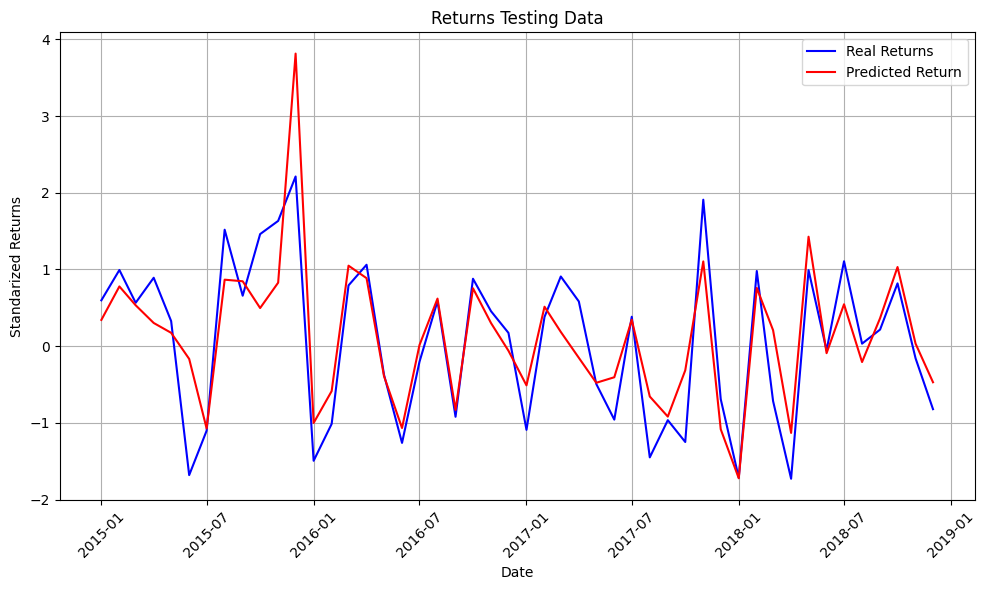

In [132]:
start=0
end=48

Y_Test_100D=ChangeToPredict_train.iloc[start:end]
Y_Test_100D.reset_index(drop=True, inplace=True)
Y_Predict_Test_100D=Y_Predict_Train_3.iloc[start:end]


Y_Test_DF = pd.DataFrame(Y_Test_100D)
Y_Predict_Test_DF = pd.DataFrame(Y_Predict_Train_3.iloc[start:end])

Y_Test_DF['Date'] = pd.to_datetime(data.index[start:end])
Y_Predict_Test_DF['Date'] = pd.to_datetime(data.index[start:end])


plt.figure(figsize=(10, 6))

plt.plot(Y_Test_DF['Date'], Y_Test_DF['ChangeToPredict'], label='Real Returns', color='blue')
plt.plot(Y_Predict_Test_DF['Date'], Y_Predict_Test_DF['ChangeToPredict'], label='Predicted Return', color='red')

plt.xlabel('Date')
plt.ylabel('Standarized Returns')
plt.title('Returns Testing Data')

plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graph Test

In [133]:
window_size = 16
transformed_AAPL_Rend_test = []

# Building the observations, 15 predictors returns and the change predicted
for i in range(1,len(test_df['AAPL']) - window_size+1):
    row = test_df['AAPL'][i:i + window_size].values
    transformed_AAPL_Rend_test.append(row)

# Create a DataFrame
columns = [f'Change_{i}' for i in range(1, window_size)] + ['ChangeToPredict']
transformed_AAPL_Rend_test = pd.DataFrame(transformed_AAPL_Rend_test, columns=columns)

# Results
transformed_AAPL_Rend_test

,Change_1,Change_2,Change_3,Change_4,Change_5,Change_6,Change_7,Change_8,Change_9,Change_10,Change_11,Change_12,Change_13,Change_14,Change_15,ChangeToPredict
0,-0.691364,-1.716663,0.979406,-0.715782,-1.729132,0.990807,-0.054405,1.106454,0.032177,0.215906,0.818239,-0.158311,-0.822150,-1.336797,-0.338855,1.011900
1,-1.716663,0.979406,-0.715782,-1.729132,0.990807,-0.054405,1.106454,0.032177,0.215906,0.818239,-0.158311,-0.822150,-1.336797,-0.338855,1.011900,-0.133241
2,0.979406,-0.715782,-1.729132,0.990807,-0.054405,1.106454,0.032177,0.215906,0.818239,-0.158311,-0.822150,-1.336797,-0.338855,1.011900,-0.133241,-0.805122
3,-0.715782,-1.729132,0.990807,-0.054405,1.106454,0.032177,0.215906,0.818239,-0.158311,-0.822150,-1.336797,-0.338855,1.011900,-0.133241,-0.805122,-0.541363
4,-1.729132,0.990807,-0.054405,1.106454,0.032177,0.215906,0.818239,-0.158311,-0.822150,-1.336797,-0.338855,1.011900,-0.133241,-0.805122,-0.541363,-0.897401
5,0.990807,-0.054405,1.106454,0.032177,0.215906,0.818239,-0.158311,-0.822150,-1.336797,-0.338855,1.011900,-0.133241,-0.805122,-0.541363,-0.897401,-0.387486
6,-0.054405,1.106454,0.032177,0.215906,0.818239,-0.158311,-0.822150,-1.336797,-0.338855,1.011900,-0.133241,-0.805122,-0.541363,-0.897401,-0.387486,1.204445
7,1.106454,0.032177,0.215906,0.818239,-0.158311,-0.822150,-1.336797,-0.338855,1.011900,-0.133241,-0.805122,-0.541363,-0.897401,-0.387486,1.204445,0.832290
8,0.032177,0.215906,0.818239,-0.158311,-0.822150,-1.336797,-0.338855,1.011900,-0.133241,-0.805122,-0.541363,-0.897401,-0.387486,1.204445,0.832290,0.331096
9,0.215906,0.818239,-0.158311,-0.822150,-1.336797,-0.338855,1.011900,-0.133241,-0.805122,-0.541363,-0.897401,-0.387486,1.204445,0.832290,0.331096,0.057724


In [134]:
ChangeToPredict_test=transformed_AAPL_Rend_test['ChangeToPredict']

del transformed_AAPL_Rend_test['ChangeToPredict']

ChangeToPredict_test

,ChangeToPredict
0,1.011900
1,-0.133241
2,-0.805122
3,-0.541363
4,-0.897401
5,-0.387486
6,1.204445
7,0.832290
8,0.331096
9,0.057724


In [135]:
Y_Predict_Test_3=modeloUni_3.predict(transformed_AAPL_Rend_test)
Y_Predict_Test_3=pd.DataFrame(Y_Predict_Test_3)
Y_Predict_Test_3.columns=['ChangeToPredict']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


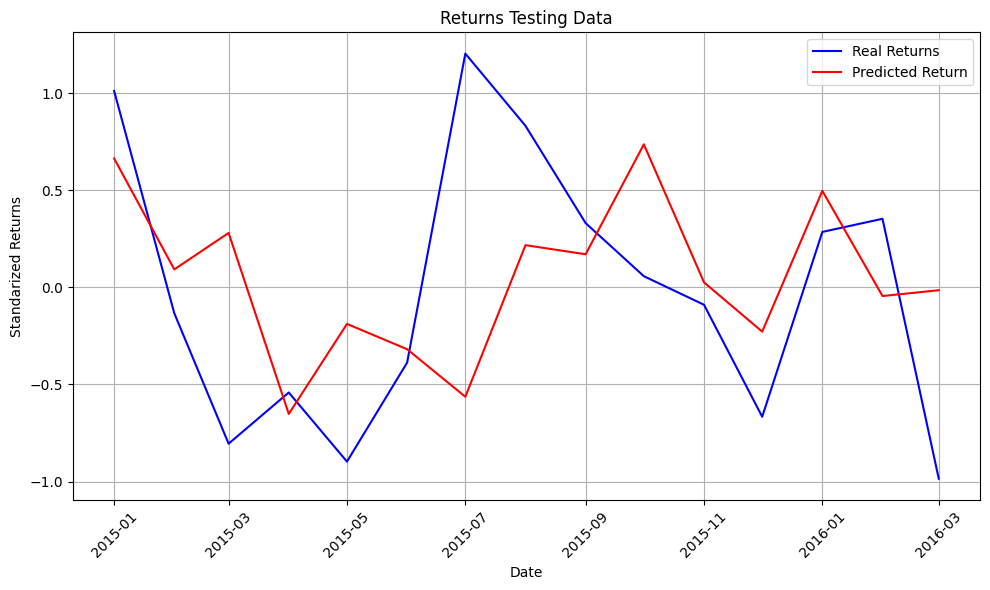

In [136]:
X_Teststart=0
end=15

Y_Test_100D=ChangeToPredict_test.iloc[start:end]
Y_Test_100D.reset_index(drop=True, inplace=True)
Y_Predict_Test_100D=Y_Predict_Test_3.iloc[start:end]


Y_Test_DF = pd.DataFrame(Y_Test_100D)
Y_Predict_Test_DF = pd.DataFrame(Y_Predict_Test_3.iloc[start:end])

Y_Test_DF['Date'] = pd.to_datetime(data.index[start:end])
Y_Predict_Test_DF['Date'] = pd.to_datetime(data.index[start:end])


plt.figure(figsize=(10, 6))

plt.plot(Y_Test_DF['Date'], Y_Test_DF['ChangeToPredict'], label='Real Returns', color='blue')
plt.plot(Y_Predict_Test_DF['Date'], Y_Predict_Test_DF['ChangeToPredict'], label='Predicted Return', color='red')

plt.xlabel('Date')
plt.ylabel('Standarized Returns')
plt.title('Returns Testing Data')

plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()